<a href="https://colab.research.google.com/github/Anshu-rai89/Array/blob/master/Kaggle_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploads=files.upload()

Saving kaggle_mnsit_test.csv to kaggle_mnsit_test.csv
Saving kaggle_mnsit_train.csv to kaggle_mnsit_train.csv


**We will Be using PCA To reduce Dimension of Given Images with keeping 99 % information **


For classification we will Use Sklearn Svm classifier For Optimization of Our Prediction We will Use Gridsearch CV To find out Optimal Value of C and Gamma And we will Use that Optimal Value To Train And Test Our Model


**Structure of Data **

Data Is Taken From Kaggle Competion Portal Only we have Train data with shape (42000,784) available in Flatten Format 

Train data is marked with Label so we have our Y train also with shape (42000)

TEST DATA 

Kaggle has provided us Test Data with shape (28000,784) in flatten format 

We have to come up with Y_prediction for each testing data and Have to submit that On Kaggle Platform for Score Calculation 

We will Be using Numpy for Handling Data 

We will use Pca To reduce dimension Of Our Train and Test Images For what We will Find value of n_componets at which we can keep our 99 % information Intact 


we will Transform our training and testing data (X only ) And will use that Transformed Data to Training And testing of our Model i.e SVM(support Vector Machine)


Our Final Accuracy Which we recived from Kaggle Submmision score is 95.77  ![alt text](https://drive.google.com/file/d/1MioBk0olmPxPvz9WdrAeMddAnpNtBeSL/view?usp=sharing)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
data=np.genfromtxt("kaggle_mnsit_train.csv",delimiter=',')

In [0]:
y_train=data[1:,0]
y_train.shape

(42000,)

In [0]:
y_train=data[1:,0]
y_train.shape

(42000,)

In [0]:
x_train=data[1:,1:]
x_train.shape


(42000, 784)

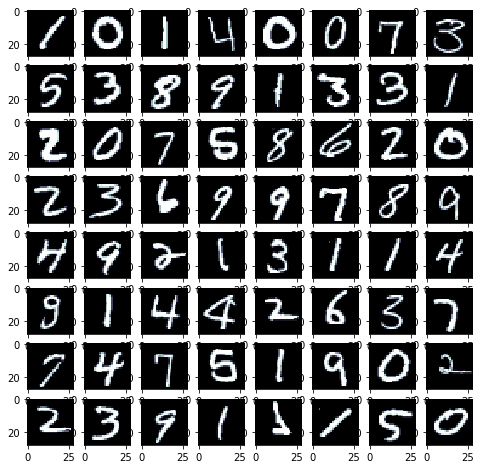

In [0]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_train.reshape((42000,28,28))[i],cmap=plt.cm.bone)
    

In [0]:
test_data=np.genfromtxt("kaggle_mnsit_test.csv",delimiter=',')
test_data.shape

(28001, 784)

In [0]:
x_test=test_data[1:]

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca=PCA()
pca.fit(x_train,y_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca.components_.shape

(784, 784)

In [0]:
k=0
total=0
while total<0.99:
    total+=pca.explained_variance_ratio_[k]
    k=k+1
k

331

In [0]:
pca=PCA(n_components=k,whiten=True)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [0]:
from sklearn import svm
import numpy as np

In [0]:
clf1=svm.SVC()
clf1.fit(x_train_pca,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
predict_svm=clf1.predict(x_test_pca)


In [0]:
label=predict_svm.reshape(len(x_test),-1)

In [0]:
#imageid=np.arange(1,28001,1).reshape(len(x_test),-1)

In [0]:
np.savetxt("predictions_1.csv",label, fmt = '%s')

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
clf = svm.SVC()
grid = {'C' : [1e2, 1e3, 5e3, 1e4, 5e4, 1e5],
       'gamma' : [1e-3, 5e-4, 1e-4, 5e-3]}
abc = GridSearchCV(clf, grid)
abc.fit(x_train_pca, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


**Prediction submitted on Kaggle Platform With Score of 95.77**